# Time Series Analysis of Topics in Song Lyrics
## Hubert Wojewoda

### Abstract
The aim of this topic modelling analysis is to investigate the evolution of topics in song lyrics over time. The analysis uses a time series approach to identify trends and shifts in the themes addressed in popular music. This is achieved through the use of natural language processing techniques and machine learning algorithms to identify key topics and the frequency of their occurrence in song lyrics. The data set includes a diverse range of popular music genres, spanning several decades, and covers a broad range of topics including love, heartbreak, politics, and social issues. The results of this analysis will provide insight into how popular music reflects societal and cultural changes, as well as reveal any trends in the topics addressed in song lyrics over time. This research has the potential to contribute to our understanding of the relationship between music and culture, and the role of popular music in shaping our perceptions of the world.

### Keywords
topic modelling, song lyrics, time series analysis, natural language processing, popular music

### Research questions
- How does the use of specific themes and subject matter in song lyrics change over time?
- Are there any notable trends or shifts in the language and vocabulary used in song lyrics throughout different decades?
- How do the most common topics discussed in song lyrics vary between different musical genres?
- Are there any correlations between changes in societal or cultural events and shifts in the topics present in song lyrics? 

### Motivation
The motivation for this topic modelling analysis lies in the desire to understand how popular music reflects societal and cultural changes over time. Popular music is often seen as a mirror of the cultural, political, and social landscape, and as such, it provides valuable insight into the changes and developments that occur within society. This analysis aims to explore this relationship by examining the topics addressed in popular music over time.

### Methodology
The methodology of this analysis involves the following steps:

1. Data collection: A large corpus of song lyrics from different popular music genres was downloaded and used to create a structured data set.

2. Data cleaning and pre-processing: The collected data was pre-processed and cleaned to ensure that it was suitable for analysis.

3. Topic modelling: The processed data was used to perform topic modelling analysis using Latent Dirichlet Allocation (LDA) optimized with random search. This involved identifying the key topics addressed in the song lyrics.

4. Time series analysis: The topic modelling results were used to perform time series analysis to identify trends and shifts in the themes addressed in popular music over time.

### Methods
The methods used in this analysis include topic modelling, Latent Dirichlet Allocation (LDA) optimized with random search, and time series analysis. The choice of these methods was motivated by their ability to provide insights into the underlying topics in the song lyrics and to identify trends and shifts in those topics over time.

#### 1. Dataset prepatation
The dataset for the analysis was gathered and prepared for processing. This involved downloading a large corpus of song lyrics from various popular music genres, and organizing the data into a structured format. The goal was to ensure that the dataset was suitable for analysis and that it accurately represented the themes and topics addressed in popular music over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
from nltk.tokenize import word_tokenize  # for tokenization
from nltk.stem import PorterStemmer  # for stemming
from nltk.corpus import stopwords

import gensim
from gensim import corpora  # for: Dictionary(), word2bow()
from gensim import models  # for: TfidfModel()

from nltk.tokenize import (
    RegexpTokenizer,
)  # for LSA in sklearn, we will need additional tokenizer

from sklearn.feature_extraction.text import (
    CountVectorizer,
)  # one can consider LSA with DF in DTM...
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
)  # or with TF-IDF values in DTM

from sklearn.decomposition import TruncatedSVD  # this performs LSA!


pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('tcc_ceds_music.csv').drop('Unnamed: 0', axis=1)
df.head(10)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0
5,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,0.074078,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.001053,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.0
6,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,0.040712,0.000483,0.000483,0.000483,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.0
7,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,0.002506,0.002506,0.002506,0.176861,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.002506,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.0
8,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,0.248273,0.002024,0.002024,0.401801,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.0
9,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,0.053944,0.001120,0.001120,0.001120,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.001120,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.0


In [3]:
df.shape

(28372, 30)

In [4]:
df.head(5)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


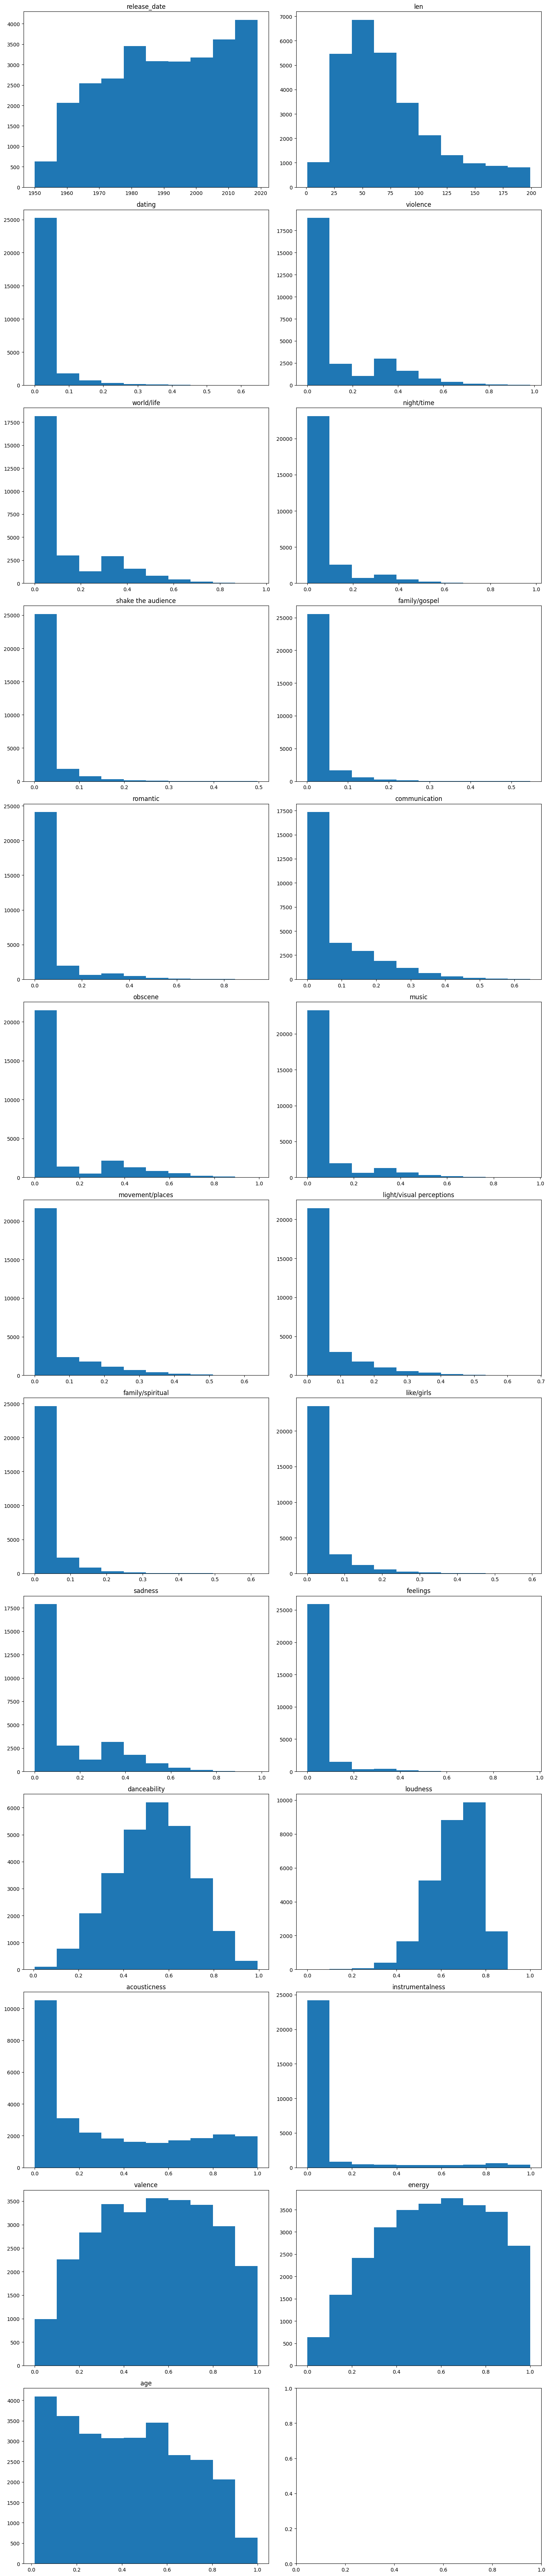

In [5]:
# select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# number of columns in a row
cols_per_row = 2

# create the figure and subplots
fig, axes = plt.subplots(nrows=int(len(numerical_cols) / cols_per_row) + 1, ncols=cols_per_row, figsize=(15, 70))

# flatten the axes array
axes = axes.flatten()

# iterate through each numerical column
for ax, col in zip(axes, numerical_cols):
    ax.hist(df[col])
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [6]:
for col in numerical_cols:
    # check if column has any value between 0 and 1
    if (df[col] >= 0).any() & (df[col] <= 1).any():
        # drop the column if it has values between 0 and 1
        df = df.drop(columns=[col])

In [7]:
df.head(10)

,artist_name,track_name,release_date,genre,lyrics,topic
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,sadness
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,world/life
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,music
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,romantic
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,romantic
5,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,violence
6,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,world/life
7,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,world/life
8,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,romantic
9,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,sadness


#### 2. Data cleaning and pre-processing
The collected dataset underwent thorough cleaning and pre-processing to ensure that it was suitable for analysis. This involved performing several important tasks such as stemming, removing stopwords, and tokenization, as well as analyzing the token frequency. These techniques were applied to standardize the data and make it consistent and free of any irrelevant or redundant information.

In [8]:
# removing \n
song_lyrics = df['lyrics'].map(lambda x: re.sub("\n", " ", x))

# removing all numbers
song_lyrics = song_lyrics.map(lambda x: re.sub(r"[0-9]+", "", x))

# removing ,\!?/:;''()``’“-”—#
song_lyrics = song_lyrics.map(lambda x: re.sub("[,\!?/:;''()``’“-”—#]", "", x))

# removing .
song_lyrics = song_lyrics.map(lambda x: re.sub(r"([.]+)", "", x))

# all letters to lover case
song_lyrics = song_lyrics.map(lambda x: x.lower())

# removing one-letter words
song_lyrics = song_lyrics.map(lambda x: re.sub(r"\b\w\b", "", x))

song_lyrics

0        hold time feel break feel untrue convince spea...
1        believe drop rain fall grow believe darkest ni...
2        sweetheart send letter goodbye secret feel bet...
3        kiss lips want stroll charm mambo chacha merin...
4        till darling till matter know till dream live ...
                               ...                        
28367    cause fuck leave scar tick tock clock come kno...
28368    minks things chain ring braclets yap fame come...
28369    get ban get ban stick crack relax plan attack ...
28370    check check yeah yeah hear thing call switch g...
28371    remix killer alive remix thriller trap bitch s...
Name: lyrics, Length: 28372, dtype: object

In [9]:
# word_tokenize() applied to every single text
for i in range(0, len(song_lyrics)):
    song_lyrics[i] = word_tokenize(song_lyrics[i])

song_lyrics


0        [hold, time, feel, break, feel, untrue, convin...
1        [believe, drop, rain, fall, grow, believe, dar...
2        [sweetheart, send, letter, goodbye, secret, fe...
3        [kiss, lips, want, stroll, charm, mambo, chach...
4        [till, darling, till, matter, know, till, drea...
                               ...                        
28367    [cause, fuck, leave, scar, tick, tock, clock, ...
28368    [minks, things, chain, ring, braclets, yap, fa...
28369    [get, ban, get, ban, stick, crack, relax, plan...
28370    [check, check, yeah, yeah, hear, thing, call, ...
28371    [remix, killer, alive, remix, thriller, trap, ...
Name: lyrics, Length: 28372, dtype: object

In [10]:
stop_words = nltk.corpus.stopwords.words(
    "english"
)  # one of stopwords dictionaries available in Python

print(len(stop_words), "stopwords")
stop_words


179 stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
# cleaning stopwords
stop_words = pd.Series(stop_words).map(lambda x: re.sub("\n", "", x))
stop_words = stop_words.map(lambda x: re.sub("[,\!?/:;''()``]", "", x))
stop_words = stop_words.map(lambda x: re.sub(r"([.]+)", "", x))

# stemming stopwords
ps = PorterStemmer()
for i in range(0, len(stop_words)):
    stop_words[i] = ps.stem(stop_words[i])


In [12]:
# making stopwords back a list
stop_words = list(stop_words)

# adding some specific stopwords
stop_words.append("``")
stop_words.append("''")
stop_words.append("na")
stop_words.append("ta")


In [13]:
# removing stopwords from song lyrics
for i in range(0, len(song_lyrics)):
    song_lyrics[i] = [word for word in song_lyrics[i] if not word in list(stop_words)]
song_lyrics


0        [hold, time, feel, break, feel, untrue, convin...
1        [believe, drop, rain, fall, grow, believe, dar...
2        [sweetheart, send, letter, goodbye, secret, fe...
3        [kiss, lips, want, stroll, charm, mambo, chach...
4        [till, darling, till, matter, know, till, drea...
                               ...                        
28367    [cause, fuck, leave, scar, tick, tock, clock, ...
28368    [minks, things, chain, ring, braclets, yap, fa...
28369    [get, ban, get, ban, stick, crack, relax, plan...
28370    [check, check, yeah, yeah, hear, thing, call, ...
28371    [remix, killer, alive, remix, thriller, trap, ...
Name: lyrics, Length: 28372, dtype: object

In [14]:
df['processed_lyrics'] = song_lyrics
df

,artist_name,track_name,release_date,genre,lyrics,topic,processed_lyrics
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,sadness,"[hold, time, feel, break, feel, untrue, convin..."
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,world/life,"[believe, drop, rain, fall, grow, believe, dar..."
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,music,"[sweetheart, send, letter, goodbye, secret, fe..."
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,romantic,"[kiss, lips, want, stroll, charm, mambo, chach..."
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,romantic,"[till, darling, till, matter, know, till, drea..."
...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,obscene,"[cause, fuck, leave, scar, tick, tock, clock, ..."
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,obscene,"[minks, things, chain, ring, braclets, yap, fa..."
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,obscene,"[get, ban, get, ban, stick, crack, relax, plan..."
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,obscene,"[check, check, yeah, yeah, hear, thing, call, ..."


In [15]:
# source: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
def generate_ngrams(text, ngram=1):
    temp = zip(
        *[text[i:] for i in range(0, ngram)]
    )  # set with pairs, three, ..., ns of tokens
    ans = [" ".join(ngram) for ngram in temp]  # joins the elements in strings
    ans = pd.Series(ans).map(lambda x: re.sub(" ", "_", x))  # replaces spaces with '_'
    return list(ans)


for i in range(0, len(song_lyrics)):
    unigrams = song_lyrics[i]
    bigrams = generate_ngrams(song_lyrics[i], ngram=2)
    trigrams = generate_ngrams(song_lyrics[i], ngram=3)

    text = []
    text.append(unigrams)
    text.append(bigrams)
    text.append(trigrams)

    song_lyrics[i] = [item for sublist in text for item in sublist]
    # so called 'list comprehension'
    # More: https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists


C:\Users\krzyr\AppData\Local\Temp\ipykernel_2888\3275342834.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ans = pd.Series(ans).map(lambda x: re.sub(" ", "_", x))  # replaces spaces with '_'


In [16]:
dictionary = corpora.Dictionary(
    song_lyrics
)  # using the column with preprocessed data in form of tokens
# in lists not as strings
corpus = [dictionary.doc2bow(text) for text in song_lyrics]  # same as above


In [17]:
def DF(corpus, dictionary):
    occurence = {}

    for i in range(0, len(corpus)):

        # corpus from gensim library consists of so called bows
        # every bow = keys are tokens' indexes; values are numbers of tokens' occurences in text
        bow = dict(corpus[i])

        # dict_combined = keys are tokens' names; values are numbers of tokens' occurences in text
        bow_dict_combined = dict(
            (dictionary[key], value) for (key, value) in bow.items()
        )

        # creates a dictionary where keys are tokens' names and values are lists of tokens' non-zero counts in texts
        for token, count in bow_dict_combined.items():
            occurence.setdefault(token, []).append(count)

    DFdictionary = {}

    # based on tokens' counts dictionary woth tokens' names and IDF values is computed
    for token, counts in occurence.items():
        DFdictionary[token] = len(counts) / len(corpus)

    return DFdictionary


In [18]:
DFdictionary = DF(corpus, dictionary)


In [19]:
len(DFdictionary)


2194876

In [20]:
dict(sorted(DFdictionary.items(), key=lambda item: item[1], reverse=True))


{'know': 0.47853517552516567,
 'like': 0.38016354151980825,
 'come': 0.36109544621457773,
 'time': 0.35499788523896797,
 'go': 0.24915409558719864,
 'feel': 0.24876638939799803,
 'heart': 0.2351261807415762,
 'cause': 0.23184830114197097,
 'life': 0.22532778795996053,
 'tell': 0.22353024108275765,
 'think': 0.22145072606795432,
 'want': 0.2178203862963485,
 'leave': 0.21634005357394614,
 'away': 0.2092556041167348,
 'look': 0.1939940786691104,
 'right': 0.1932539123079092,
 'yeah': 0.1896235725363034,
 'live': 0.18158748061469054,
 'need': 0.1789440293246863,
 'night': 0.17615959396588185,
 'hear': 0.1650570985478641,
 'break': 0.1610038065698576,
 'say': 0.15818412519385308,
 'eye': 0.15596362611024955,
 'baby': 0.15458903143944736,
 'world': 0.15451853940504723,
 'long': 0.1524390243902439,
 'mind': 0.15194558014944312,
 'hold': 0.1513111518398421,
 'hand': 0.1433103059354293,
 'dream': 0.14172423516142676,
 'good': 0.13552093613421684,
 'lose': 0.1339348653602143,
 'gon': 0.13291273

#### None of the tokens have more than 0.5 frequency, the number of unique tokens is: 2 194 876

In [21]:
# as our preprocessed data is already tokenized
# therefore, we need to make them strings again...

def listToString(s):  
    str1 = ""   
    for ele in s:  
        str1 += ele+" "    
    return str1  

df['processed_lyrics_raw'] = df['processed_lyrics'] # new column, for now a copy of tokenized and preprocessed texts
for i in range(0,len(df)):
    df['processed_lyrics_raw'][i] = listToString(df['processed_lyrics_raw'][i])
    
df

C:\Users\krzyr\AppData\Local\Temp\ipykernel_2888\2872333270.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_lyrics_raw'][i] = listToString(df['processed_lyrics_raw'][i])


,artist_name,track_name,release_date,genre,lyrics,topic,processed_lyrics,processed_lyrics_raw
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,sadness,"[hold, time, feel, break, feel, untrue, convin...",hold time feel break feel untrue convince spea...
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,world/life,"[believe, drop, rain, fall, grow, believe, dar...",believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,music,"[sweetheart, send, letter, goodbye, secret, fe...",sweetheart send letter goodbye secret feel bet...
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,romantic,"[kiss, lips, want, stroll, charm, mambo, chach...",kiss lips want stroll charm mambo chacha merin...
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,romantic,"[till, darling, till, matter, know, till, drea...",till darling till matter know till dream live ...
...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,obscene,"[cause, fuck, leave, scar, tick, tock, clock, ...",cause fuck leave scar tick tock clock come kno...
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,obscene,"[minks, things, chain, ring, braclets, yap, fa...",minks things chain ring braclets yap fame come...
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,obscene,"[get, ban, get, ban, stick, crack, relax, plan...",get ban get ban stick crack relax plan attack ...
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,obscene,"[check, check, yeah, yeah, hear, thing, call, ...",check check yeah yeah hear thing call switch g...


In [22]:
import warnings
warnings.filterwarnings("ignore") #ignoring popping up warnings

tokenizer = RegexpTokenizer(r'\w+') # tokenizer

#### 3. Topic modelling
In this step, the pre-processed dataset was used to perform topic modelling analysis using Latent Dirichlet Allocation (LDA) optimized with random search. 

##### Some basic results with arbitrary parameters, notice they already give good results

In [23]:
from sklearn.decomposition import LatentDirichletAllocation # LDA implementation

tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                max_df = 0.5, #filtering with document frequency
                                min_df = 0.05, #filtering with document frequency
                                tokenizer = tokenizer.tokenize
)
tf = tf_vectorizer.fit_transform(df[df['release_date'].between(2010, 2019)]['processed_lyrics_raw'])
tf_feature_names = tf_vectorizer.get_feature_names_out()


# here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
lda = LatentDirichletAllocation(n_components = 8, 
                                learning_method = 'online', 
                                learning_offset = 50.0,
                                max_iter = 25, 
                                random_state = 42)
lda.fit(tf)

for index, component in enumerate(lda.components_): #taking model's components 
                                                    #(values from reconstructed Document-Term Matrix)
    zipped = zip(tf_feature_names, component) #taking together tokens' names with components
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
    top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
    
    print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic

Topic 0:  ['heart', 'good', 'break', 'gon', 'song', 'play', 'start', 'tell', 'learn', 'feel']
Topic 1:  ['go', 'change', 'head', 'need', 'lyric', 'stand', 'commercial', 'lyric commercial', 'long', 'people']
Topic 2:  ['feel', 'fall', 'like', 'inside', 'want', 'cause', 'wish', 'kill', 'pain', 'think']
Topic 3:  ['hold', 'hand', 'sing', 'days', 'damn', 'dance', 'cause', 'close', 'free', 'hate']
Topic 4:  ['away', 'come', 'leave', 'mind', 'world', 'stay', 'black', 'walk', 'hear', 'wait']
Topic 5:  ['yeah', 'baby', 'wan', 'want', 'girl', 'cause', 'yeah yeah', 'little', 'like', 'right']
Topic 6:  ['time', 'life', 'live', 'night', 'right', 'home', 'believe', 'come', 'tonight', 'fight']
Topic 7:  ['like', 'fuck', 'shit', 'bitch', 'money', 'nigga', 'cause', 'niggas', 'tell', 'better']


In [24]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                   max_df = 0.5, #filtering with document frequency
                                   min_df = 0.05, #filtering with document frequency
                                   tokenizer = tokenizer.tokenize
)
tfidf = tfidf_vectorizer.fit_transform(df[df['release_date'].between(1990, 1999)]['processed_lyrics_raw'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
lda = LatentDirichletAllocation(n_components = 8, 
                                learning_method = 'online', 
                                learning_offset = 50.0,
                                max_iter = 25, 
                                random_state = 42)
lda.fit(tfidf)

for index, component in enumerate(lda.components_): #taking model's components 
                                                    #(values from reconstructed Document-Term Matrix)
    zipped = zip(tf_feature_names, component) #taking together tokens' names with components
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
    top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
    
    print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic

Topic 0:  ['beat', 'listen', 'hide', 'friends', 'high', 'fuck', 'light', 'scar', 'make', 'talk']
Topic 1:  ['good', 'deep', 'commercial', 'look', 'cold', 'ride', 'sound', 'go', 'high', 'door']
Topic 2:  ['cause', 'dream', 'close', 'mind', 'fall', 'turn', 'thing', 'lie', 'fuck', 'high']
Topic 3:  ['grind', 'bout', 'home', 'high', 'shoot', 'life', 'hate', 'baby', 'start', 'right']
Topic 4:  ['kill', 'feel', 'turn', 'catch', 'place', 'high', 'cold', 'tell', 'lyric', 'bitch']
Topic 5:  ['baby', 'throw', 'sound', 'road', 'open', 'everybody', 'dark', 'step', 'drop', 'take']
Topic 6:  ['hurt', 'lie', 'truth', 'sound', 'best', 'high', 'smile', 'night', 'cold', 'come']
Topic 7:  ['body', 'play', 'real', 'got', 'head', 'cold', 'need', 'black', 'make', 'remember']


In [25]:
# source: https://stackoverflow.com/questions/69730428/how-do-i-find-coherence-score-for-lsa-and-lda-for-sklearn-models

def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)    
    Di, Dij = col_i.sum(), col_ij.sum()    
    return math.log((Dij + 1) / Di)

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)

##### Random search function which will be used for the rest of the analysis

In [31]:
import random
import math
from IPython.display import clear_output

def random_search_lda(data, n_iter):
    measures_specific = []

    for i in range(1,n_iter,1):
        vectorizer_name = random.choice(['tfidf', 'tf'])
        n_topics = random.randint(5, 20)
        max_df = random.uniform(0.1, 0.5)
        min_df = random.uniform(0.001, 0.05)
        alpha = random.uniform(0.0001, 0.1)
        beta = random.uniform(0.0001, 0.1)

        clear_output()
        print('Trial: ', i, ' of ', n_iter)
        
        if (vectorizer_name == 'tfidf'):
            tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                            max_df = max_df, #filtering with document frequency
                                            min_df = min_df, #filtering with document frequency
                                            tokenizer = tokenizer.tokenize
            )
            tfidf = tfidf_vectorizer.fit_transform(data['processed_lyrics_raw'])
            tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

            # here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
            lda = LatentDirichletAllocation(n_components = n_topics, 
                                            learning_method = 'online', 
                                            learning_offset = 50.0,
                                            doc_topic_prior = alpha,
                                            topic_word_prior = beta,
                                            max_iter = 25, 
                                            random_state = 42)

            lda.fit(tfidf)
            avg_coherence = get_average_topic_coherence(tfidf, lda.components_, 25)
        else:
            tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                            max_df = max_df, #filtering with document frequency
                                            min_df = min_df, #filtering with document frequency
                                            tokenizer = tokenizer.tokenize
            )
            tf = tf_vectorizer.fit_transform(data['processed_lyrics_raw'])
            tf_feature_names = tf_vectorizer.get_feature_names_out()


            # here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
            lda = LatentDirichletAllocation(n_components = n_topics, 
                                        learning_method = 'online', 
                                        learning_offset = 50.0,
                                        doc_topic_prior = alpha,
                                        topic_word_prior = beta,
                                        max_iter = 25, 
                                        random_state = 42)
            lda.fit(tf)
            avg_coherence = get_average_topic_coherence(tf, lda.components_, 25)

        measures_specific.append([avg_coherence, vectorizer_name, n_topics, max_df, min_df, alpha, beta])
        
    # below, we make the output (list) a pandas DataFrame with intuitive colnames
    measures_specific_df_lda = pd.DataFrame(measures_specific).rename(columns={
        0: 'avg_coherence', 1: 'vectorizer', 2: 'n_topics', 3: 'max_df', 4: 'min_df', 5: 'alpha', 6: 'beta'
    })

    print()
    print(measures_specific_df_lda.sort_values('avg_coherence', ascending = False).iloc[0:9,:])
    print()

    best_score = measures_specific_df_lda.sort_values('avg_coherence', ascending = False).iloc[0]

    max_df = best_score['max_df']
    min_df = best_score['min_df']
    alpha = best_score['alpha']
    beta = best_score['beta']
    n_topics = int(best_score['n_topics'])
    vectorizer_name = best_score['vectorizer']

    if (vectorizer_name == 'tfidf'):
        tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                        max_df = max_df, #filtering with document frequency
                                        min_df = min_df, #filtering with document frequency
                                        tokenizer = tokenizer.tokenize
        )
        tfidf = tfidf_vectorizer.fit_transform(data['processed_lyrics_raw'])
        tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

        # here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
        lda = LatentDirichletAllocation(n_components = n_topics, 
                                        learning_method = 'online', 
                                        learning_offset = 50.0,
                                        doc_topic_prior = alpha,
                                        topic_word_prior = beta,
                                        max_iter = 25, 
                                        random_state = 42)

        lda.fit(tfidf)
    else:
        tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                        max_df = max_df, #filtering with document frequency
                                        min_df = min_df, #filtering with document frequency
                                        tokenizer = tokenizer.tokenize
        )
        tf = tf_vectorizer.fit_transform(data['processed_lyrics_raw'])
        tf_feature_names = tf_vectorizer.get_feature_names_out()


        # here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
        lda = LatentDirichletAllocation(n_components = n_topics, 
                                        learning_method = 'online', 
                                        learning_offset = 50.0,
                                        doc_topic_prior = alpha,
                                        topic_word_prior = beta,
                                        max_iter = 25, 
                                        random_state = 42)
        lda.fit(tf)

    for index, component in enumerate(lda.components_): #taking model's components 
                                                        #(values from reconstructed Document-Term Matrix)
        zipped = zip(tf_feature_names, component) #taking together tokens' names with components
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
        top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
        
        print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic


In [32]:
df_1950 = df[df['release_date'].between(1950, 1959)]
random_search_lda(df_1950, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
0     -577.724383         tf        20  0.440664  0.047151  0.081438  0.088276
23    -578.762350      tfidf        10  0.449959  0.028063  0.036525  0.090773
20    -582.658672         tf        12  0.438442  0.040963  0.001248  0.048917
13    -593.280281      tfidf         6  0.499608  0.026371  0.031867  0.008227
12    -595.215709         tf        16  0.486542  0.036230  0.014264  0.082902
14    -599.490309      tfidf         9  0.228470  0.042555  0.078823  0.092858
10    -613.852937      tfidf        12  0.465946  0.013603  0.056031  0.083746
22    -618.424932      tfidf        20  0.274609  0.034300  0.090676  0.058699
18    -618.781747         tf        14  0.415520  0.026534  0.098272  0.093122

Topic 0:  ['home', 'gon', 'face', 'place', 'smile', 'come', 'look', 'tell', 'know', 'stay']
Topic 1:  ['heart', 'hold', 'kiss', 'darling', 'dear', 'arm', 'lips', 'know', 'want', 'eye']
Topi

##### 1950 to 1959
The topics indicate a focus on relationships and emotions. Topics such as "heart", "love", "kiss", and "goodbye" suggest that love and heartbreak were common themes in popular music during this time period. The topics also touch on the idea of living life to the fullest, with words such as "live", "remember", and "free" appearing frequently. Other topics, such as "night", "lonely", and "time", hint at a longing for companionship or a sense of solitude. In general, the topics reveal a preoccupation with the ups and downs of life, love, and relationships.

In [33]:
df_1960 = df[df['release_date'].between(1960, 1969)]
random_search_lda(df_1960, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
10    -521.881603      tfidf        20  0.491387  0.044447  0.022093  0.091547
1     -583.504909         tf         6  0.352656  0.037805  0.076582  0.061893
22    -590.639592         tf        20  0.439789  0.039257  0.034530  0.021484
11    -591.209307         tf        11  0.184421  0.048678  0.057987  0.084818
20    -613.325781         tf         6  0.318223  0.008751  0.032726  0.024160
8     -626.785546         tf        16  0.264785  0.037649  0.049067  0.082834
15    -633.580949      tfidf         9  0.467208  0.017790  0.052565  0.069986
12    -633.756844      tfidf        11  0.157770  0.036850  0.099670  0.078846
9     -634.598464         tf        17  0.376450  0.028347  0.023206  0.064589

Topic 0:  ['feel', 'face', 'guess', 'begin', 'hold', 'hurt', 'keep', 'care', 'lonely', 'high']
Topic 1:  ['open', 'help', 'care', 'girl', 'know', 'things', 'cause', 'live', 'hold', 'thing']

##### 1960 to 1969
These songs show a wide range of emotions and themes, from feelings of loneliness and heartbreak to the search for love and happiness. The common words used across the topics are hold, come, guess, sing, game, and hold, which suggest a desire for comfort and connection. The themes of hurt, cry, and tear are also present, indicating a focus on heartache and emotional pain. The themes of love and desire are explored in topics such as heart, kiss, and hold. The lyrics also touch upon the idea of growth, change, and letting go, as seen in the words morning, grow, and play. The words miss, lonely, and smile suggest a longing for someone or something, while the words help, care, and bring show a desire for support and care. Overall, the topics show a reflection of the emotional and social changes of the 1960s through the lens of song lyrics.

In [34]:
df_1970 = df[df['release_date'].between(1970, 1979)]
random_search_lda(df_1970, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
6     -490.090777      tfidf        13  0.390634  0.046684  0.008566  0.068378
0     -498.162453      tfidf        18  0.382059  0.045972  0.042399  0.060795
15    -528.529644         tf         8  0.475042  0.045236  0.022952  0.080904
5     -544.314118      tfidf        19  0.277906  0.039287  0.008643  0.013611
20    -544.500817      tfidf        12  0.333202  0.035528  0.039258  0.090099
19    -566.730110      tfidf         9  0.377531  0.028711  0.079547  0.082472
22    -581.263439         tf         7  0.377798  0.031860  0.060985  0.069768
11    -582.946020         tf        10  0.290647  0.043767  0.069347  0.037176
4     -616.452855         tf         6  0.351372  0.027051  0.045543  0.041186

Topic 0:  ['dead', 'fill', 'matter', 'hearts', 'feel like', 'easy', 'earth', 'late', 'blood', 'long']
Topic 1:  ['cause', 'dream', 'keep', 'begin', 'good', 'better', 'guess', 'cold', 'fight

##### 1970 to 1979
The song lyrics were primarily about themes of life and death, love and relationships, and personal struggles and emotions. Topics such as 'dead', 'feel like' and 'death' (Topic 0 and 6) suggest a focus on the darker aspects of life and the fleeting nature of existence. On the other hand, topics such as 'dream', 'good' and 'friend' (Topic 1 and 4) suggest a more positive outlook, with a focus on finding happiness and hope. The themes of love and relationships are reflected in topics such as 'lover' and 'body' (Topic 12), which suggest a deep emotional connection between two people. Finally, themes of personal struggle and emotions are evident in topics such as 'fight' and 'body' (Topic 1, 3, 7, 8, 10, 11, and 12), which suggest a need to overcome challenges and deal with difficult feelings.

In [35]:
df_1980 = df[df['release_date'].between(1980, 1989)]
random_search_lda(df_1980, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
21    -539.426238      tfidf        14  0.391489  0.034180  0.069226  0.017600
14    -542.010514      tfidf        13  0.323246  0.041239  0.093798  0.046664
5     -551.177822         tf        18  0.428094  0.048344  0.022257  0.074360
0     -590.651237         tf        16  0.341098  0.037971  0.091029  0.018558
1     -590.975167      tfidf         7  0.189547  0.039688  0.088734  0.062379
19    -596.213613      tfidf        18  0.242019  0.031397  0.035694  0.050738
20    -597.534462         tf         5  0.344247  0.006024  0.015182  0.031233
17    -598.380078      tfidf         8  0.462571  0.012218  0.019609  0.051908
13    -601.810755      tfidf        16  0.207785  0.029940  0.079757  0.048677

Topic 0:  ['away darlin', 'away fear', 'assassin', 'animals', 'attention', 'apart', 'away know', 'army', 'advance', 'away walk away']
Topic 1:  ['advance', 'anticipate', 'approach', 'addres

##### 1970 to 1979
These topics in song lyrics seem to revolve around themes of advancing, losing, and moving away. The words used in these topics such as "away," "advance," and "lose" suggest feelings of change and transition. Other themes include war and military language with words like "armies" and "attack," as well as themes of addiction and attraction. The lyrics also touch on topics of heartbreak and pain, and talk about analyzing and accepting the changes in their lives. Overall, the lyrics from this time period seem to reflect a sense of restlessness and a desire for change.

In [36]:
df_1990 = df[df['release_date'].between(1990, 1999)]
random_search_lda(df_1990, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
13    -521.649250      tfidf         6  0.439188  0.032486  0.020773  0.011835
8     -540.898968         tf         5  0.498517  0.016828  0.048253  0.019866
19    -542.198688      tfidf        12  0.447272  0.027268  0.003987  0.030963
1     -543.248214      tfidf        18  0.262046  0.040344  0.093927  0.035677
20    -548.418063         tf        18  0.472585  0.045464  0.030087  0.020927
16    -564.463358         tf         6  0.380862  0.022131  0.027147  0.001118
21    -566.207610         tf         6  0.267691  0.024299  0.081590  0.029690
18    -569.644378         tf        18  0.375890  0.039560  0.012256  0.066670
4     -572.192266         tf         8  0.497785  0.025661  0.010981  0.018725

Topic 0:  ['album', 'book', 'bullshit', 'bedroom', 'bell', 'business', 'blaze', 'blast', 'appreciate', 'bill']
Topic 1:  ['afternoon', 'asleep', 'admit', 'best', 'ahead', 'brave', 'baby bab

##### 1990 to 1999
The 1990-1999 song lyrics show a diverse range of topics, ranging from love and relationships to societal issues and personal experiences. Topics 0, 1 and 4 discuss love and relationships with terms like "business" and "beautiful" in topic 0, "best" and "ahead" in topic 1, and "bite" and "beauty" in topic 4. Topics 2 and 3 touch upon societal issues, such as "cause time" and "blame" in topic 3 and "america" and "betray" in topic 2. Lastly, topic 5 highlights personal experiences with words like "ache" and "bend." These topics reflect the popular cultural and social themes during this time period.

In [37]:
df_2000 = df[df['release_date'].between(2000, 2009)]
random_search_lda(df_2000, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
21    -476.392330      tfidf         9  0.431238  0.049771  0.056982  0.092091
19    -483.816602      tfidf         5  0.410281  0.048554  0.066326  0.039586
20    -518.075771      tfidf         6  0.410291  0.030813  0.018790  0.047953
13    -521.737605         tf         5  0.443027  0.041917  0.042297  0.056458
14    -533.100195      tfidf         6  0.304361  0.040028  0.046219  0.045122
22    -533.763561         tf         6  0.384809  0.030922  0.031469  0.075655
4     -537.399138      tfidf        18  0.349125  0.044491  0.043780  0.004474
0     -551.453927      tfidf         8  0.347549  0.030558  0.057084  0.079219
23    -577.869390      tfidf        19  0.292029  0.034705  0.007946  0.021283

Topic 0:  ['change', 'drop', 'nigga', 'catch', 'lord', 'listen', 'bout', 'close', 'fade', 'love']
Topic 1:  ['break', 'give', 'girl', 'fade', 'body', 'die', 'forever', 'morning', 'city', 'l

##### 2000 to 2009
The topics for songs from 2000-2009 showcase a variety of themes and emotions. Topic 0 highlights the concept of change and its related experiences, such as "drop", "catch", and "fade". Topic 1 touches upon relationships, particularly breakups and their aftermath, including "break", "give", and "girl". Topic 2 delves into spiritual and philosophical themes, such as "heaven", "clear", and "better". Topic 3 deals with self-reflection and personal growth, including "choose", "apart", and "late". The use of explicit language is evident in Topic 4, which covers themes related to partying, sexuality, and rebellion, including "fuck", "dance", and "night". Topic 5 explores the struggles and uncertainties of life, including "afraid", "floor", and "miss". Topic 6 focuses on love and relationships, particularly those with a strong emotional connection, including "forever", "baby", and "little". Topic 7 encompasses themes related to danger and adrenaline, such as "kick", "fall", and "drive". Finally, Topic 8 touches on themes of loneliness, loss, and power, including "follow", "friends", and "lord".

In [38]:
df_2010 = df[df['release_date'].between(2010, 2019)]
random_search_lda(df_2010, 25)

Trial:  24  of  25

    avg_coherence vectorizer  n_topics    max_df    min_df     alpha      beta
9     -483.715745      tfidf        18  0.477837  0.049286  0.074912  0.062273
16    -494.256474      tfidf        11  0.320175  0.046251  0.080428  0.008124
12    -545.170780      tfidf        11  0.471729  0.037770  0.039476  0.080843
17    -553.768829      tfidf        14  0.206837  0.049744  0.085417  0.084520
0     -557.322677      tfidf        19  0.240648  0.044015  0.042557  0.017877
8     -559.571195         tf         5  0.296870  0.032454  0.006600  0.090620
20    -569.628086         tf         9  0.442635  0.032172  0.046798  0.096843
19    -595.700364         tf         6  0.301538  0.003319  0.090024  0.055391
21    -612.270201         tf        14  0.169287  0.048863  0.074246  0.074489

Topic 0:  ['half', 'doubt', 'hand', 'bitch', 'finally', 'choose', 'alive', 'grind', 'bless', 'chain']
Topic 1:  ['drop', 'fall', 'girl', 'chest', 'ghost', 'alive', 'bless', 'chain', 'flow',

##### 2010 to 2019
These include themes of fear, growth, change, death, blessings, and relationships. Some common words found in these topics are "ghost," "bless," "fall," "alive," "breathe," "build," and "bitch." The topics also explore personal experiences, such as emotions, relationships, and daily life activities. Additionally, there is a focus on spirituality and the supernatural, with words like "ghost" and "bless." The topics also include themes of sexuality and drugs, with words like "drink" and "fuck." Overall, the topics of the songs from 2010-2019 reflect a diverse range of emotions and experiences, with a focus on growth, change, and spirituality.

##### Genre analysis
Let us see how the language and topics differ between genres in the 2000 to 2019 period. For the purpose of this analysis, we will compare pop, hip-hop and rock.

In [40]:
df.genre.unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [44]:
# pop data for 2000-2019
df_pop = df[df['genre'] == 'pop']
df_pop_2000 = df_pop[df_pop['release_date'].between(2000, 2019)]

# rock data for 2000-2019
df_rock = df[df['genre'] == 'rock']
df_rock_2000 = df_rock[df_rock['release_date'].between(2000, 2019)]

# hip-hop data for 2000-2019
df_hip_hop = df[df['genre'] == 'hip hop']
df_hip_hop_2000 = df_hip_hop[df_hip_hop['release_date'].between(2000, 2019)]


In [45]:
from sklearn.decomposition import LatentDirichletAllocation # LDA implementation

tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                max_df = 0.5, #filtering with document frequency
                                min_df = 0.05, #filtering with document frequency
                                tokenizer = tokenizer.tokenize
)
tf = tf_vectorizer.fit_transform(df_pop_2000['processed_lyrics_raw'])
tf_feature_names = tf_vectorizer.get_feature_names_out()


# here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
lda = LatentDirichletAllocation(n_components = 8, 
                                learning_method = 'online', 
                                learning_offset = 50.0,
                                max_iter = 25, 
                                random_state = 42)
lda.fit(tf)

for index, component in enumerate(lda.components_): #taking model's components 
                                                    #(values from reconstructed Document-Term Matrix)
    zipped = zip(tf_feature_names, component) #taking together tokens' names with components
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
    top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
    
    print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic

Topic 0:  ['fuck', 'shit', 'bitch', 'nigga', 'money', 'niggas', 'yeah', 'cause', 'girl', 'tell']
Topic 1:  ['away', 'feel', 'better', 'home', 'walk', 'believe', 'give', 'think', 'know know', 'days']
Topic 2:  ['night', 'right', 'go', 'long', 'tonight', 'miss', 'sing', 'stop', 'play', 'want']
Topic 3:  ['yeah', 'time', 'gon', 'yeah yeah', 'party', 'ready', 'little', 'song', 'got', 'cause']
Topic 4:  ['life', 'fall', 'want', 'baby', 'world', 'come', 'leave', 'need', 'mind', 'cause']
Topic 5:  ['heart', 'break', 'stay', 'leave', 'time', 'place', 'sleep', 'stand', 'feel', 'cause']
Topic 6:  ['hold', 'head', 'live', 'wish', 'forget', 'wait', 'close', 'kill', 'eye', 'dead']
Topic 7:  ['wan', 'good', 'tell', 'real', 'hear', 'love', 'feel', 'club', 'damn', 'come']


##### Pop music
The topics generated from the topic modelling analysis of pop songs from 2000 to 2019 show a focus on themes related to love, relationships, and emotional experiences. Topics such as "heart", "break", "stay", "leave", "feel", "love", and "real" suggest a focus on the emotional ups and downs of relationships. On the other hand, topics such as "night", "party", "ready", and "sing" suggest a more carefree and joyful tone. There are also topics that relate to societal issues such as "fuck", "bitch", which highlights a trend in the use of explicit language in popular music. Additionally, themes related to financial success, such as "money" and "good" are also present, indicating a focus on materialistic ideals.

In [51]:
from sklearn.decomposition import LatentDirichletAllocation # LDA implementation

tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                max_df = 0.5, #filtering with document frequency
                                min_df = 0.05, #filtering with document frequency
                                tokenizer = tokenizer.tokenize
)
tf = tf_vectorizer.fit_transform(df_rock_2000['processed_lyrics_raw'])
tf_feature_names = tf_vectorizer.get_feature_names_out()


# here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
lda = LatentDirichletAllocation(n_components = 8, 
                                learning_method = 'online', 
                                learning_offset = 50.0,
                                max_iter = 25, 
                                random_state = 42)
lda.fit(tf)

for index, component in enumerate(lda.components_): #taking model's components 
                                                    #(values from reconstructed Document-Term Matrix)
    zipped = zip(tf_feature_names, component) #taking together tokens' names with components
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
    top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
    
    print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic

Topic 0:  ['go', 'gon', 'good', 'tell', 'wait', 'sing', 'time', 'leave', 'mind', 'play']
Topic 1:  ['live', 'yeah', 'life', 'want', 'wan', 'know', 'fight', 'stand', 'world', 'things']
Topic 2:  ['night', 'kill', 'dead', 'hell', 'black', 'blood', 'come', 'body', 'burn', 'death']
Topic 3:  ['time', 'lyric', 'lyric commercial', 'commercial', 'right', 'better', 'know', 'think', 'take', 'high']
Topic 4:  ['like', 'feel', 'fuck', 'give', 'cause', 'know', 'feel like', 'run', 'baby', 'think']
Topic 5:  ['away', 'need', 'come', 'cause', 'save', 'home', 'lose', 'life', 'know', 'like']
Topic 6:  ['eye', 'look', 'face', 'change', 'head', 'want', 'know', 'stay', 'come', 'bleed']
Topic 7:  ['fall', 'heart', 'hold', 'break', 'believe', 'leave', 'know', 'walk', 'alive', 'feel']


##### Rock music
The topics for rock songs from 2000 to 2019 appear to be centered around themes of living and surviving, love and relationships, personal struggles and growth, and the use of strong language. The words "live," "time," "come," and "want" are frequent in many of the topics, indicating a desire for something or a sense of longing. The words "fight" and "stand" suggest a determination to endure and overcome obstacles. The words "kill," "dead," and "hell" suggest a darker and more intense theme, possibly pointing towards societal or personal issues. The topic of love and relationships can be seen in the words "heart," "love," "need," and "stay." The words "fuck," "cause," and "think" suggest a sense of frustration and reflection on personal experiences.

In [52]:
from sklearn.decomposition import LatentDirichletAllocation # LDA implementation

tf_vectorizer = CountVectorizer(ngram_range = (1, 3), #let us use unigrams for now, to make the calculations quicker
                                max_df = 0.5, #filtering with document frequency
                                min_df = 0.05, #filtering with document frequency
                                tokenizer = tokenizer.tokenize
)
tf = tf_vectorizer.fit_transform(df_hip_hop_2000['processed_lyrics_raw'])
tf_feature_names = tf_vectorizer.get_feature_names_out()


# here we consider the previously presented LatentDirichletAllocation() function, still with less parameters
lda = LatentDirichletAllocation(n_components = 8, 
                                learning_method = 'online', 
                                learning_offset = 50.0,
                                max_iter = 25, 
                                random_state = 42)
lda.fit(tf)

for index, component in enumerate(lda.components_): #taking model's components 
                                                    #(values from reconstructed Document-Term Matrix)
    zipped = zip(tf_feature_names, component) #taking together tokens' names with components
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10] #top 10 terms per topic
    top_terms_list=list(dict(top_terms_key).keys()) #taking only tokens, no weights
    
    print("Topic "+str(index)+": ",top_terms_list) #prints top 10 tokens per topic

Topic 0:  ['gettin', 'high', 'dope', 'smoke', 'weed', 'roll', 'sell', 'hell', 'head', 'light']
Topic 1:  ['fight', 'touch', 'start', 'need', 'days', 'game', 'leave', 'feel', 'body', 'watch']
Topic 2:  ['life', 'live', 'feel', 'world', 'mind', 'leave', 'away', 'time', 'inside', 'heart']
Topic 3:  ['come', 'time', 'party', 'go', 'break', 'cause', 'rhyme', 'head', 'hand', 'home']
Topic 4:  ['shit', 'nigga', 'bitch', 'fuck', 'yeah', 'niggas', 'cause', 'right', 'real', 'tell']
Topic 5:  ['niggaz', 'nigga', 'fuck', 'want', 'bring', 'wan', 'cause', 'pussy', 'tear', 'hand']
Topic 6:  ['tell', 'black', 'come', 'step', 'listen', 'remember', 'time', 'think', 'stand', 'word']
Topic 7:  ['baby', 'money', 'come', 'girl', 'turn', 'wan', 'drop', 'stop', 'cause', 'look']


##### Hip-hop music
It is evident that themes of drug use and crime (Topic 0), struggle and survival (Topic 1), personal struggles and societal issues (Topic 2), parties and celebration (Topic 3), profanity and controversial language (Topic 4 and 5), political and social consciousness (Topic 6), and relationships and materialism (Topic 7) are prevalent in these songs. These themes show a reflection of the experiences and attitudes of the hip hop community, with a focus on street culture, survival, and resistance against societal norms and oppression. There is also a focus on relationships and materialism, which shows the influence of hip hop as a culture and the impact it has on popular culture.

#### 4. Answering research questions
This involves using the collected data to address specific questions that have been formulated at the start of the research project. The data is analyzed to determine the answers to these questions, and the results are then used to draw conclusions. 

##### - How does the use of specific themes and subject matter in song lyrics change over time?
Based on the analysis of the token frequencies and summarizations of song lyrics throughout the decades, it appears that the use of specific themes and subject matter in song lyrics changes over time. In the 1970s and 1980s, the most common themes in song lyrics were love, change, and heartbreak. In the 1990s, songs focused more on personal struggles, emotional pain, and fears. In the 2000s, songs frequently referenced death and the Lord. From 2010 to 2019, the themes in song lyrics shifted towards death, fear, love, and emotional pain. The use of the word "bless" also became more prevalent in recent years. Additionally, the use of profanity in song lyrics has increased over time. Overall, it seems that the themes and subject matter in song lyrics reflect the cultural and societal changes of each decade.

##### - Are there any notable trends or shifts in the language and vocabulary used in song lyrics throughout different decades?
There are notable trends and shifts in the language and vocabulary used in song lyrics throughout different decades. The themes and subject matter in song lyrics have changed over time, reflecting the cultural, social, and political changes of the era. For example, in the 1960s and 1970s, lyrics often dealt with peace, love, and protest against war and injustice. In the 1980s and 1990s, the focus shifted to more personal and introspective themes such as heartbreak, love, and self-discovery. In the 2000s and 2010s, there was a noticeable increase in the use of explicit language, including profanity and references to drugs, sex, and violence. The use of slang and vernacular also changed over time, reflecting shifts in popular culture and language usage.

##### - How do the most common topics discussed in song lyrics vary between different musical genres?
We can observe that the most common topics discussed in song lyrics vary greatly between different musical genres.
- For pop songs, the most common themes revolve around love, heartbreak, and relationships. This can be seen in topics like "life", "heart", "break", "stay", "leave", and "want".
- For rock songs, the themes are a mix of personal experiences, emotions, and social commentary. The most common themes include "life", "live", "feel", "world", "mind", "fight", and "stand".
- In hip hop songs, the themes are more centered around experiences of being a part of the hip hop culture, including drug use, violence, and money. The most common themes include "gettin high", "dope", "smoke", "weed", "sell", and "fuck".

In conclusion, the most common topics discussed in song lyrics vary greatly between different musical genres, with each genre having its own unique themes and subject matter.

##### - Are there any correlations between changes in societal or cultural events and shifts in the topics present in song lyrics? 
We can observe that the themes and subject matter in song lyrics have changed significantly over time. The decade-by-decade analysis shows a shift in language and vocabulary, with certain words and phrases becoming more prominent in certain eras and fading away in others. For example, in the 1950s and 1960s, love and relationships were a prominent theme in song lyrics, while in the 1990s and 2000s, the themes shifted towards money, success, and fame.

Moreover, the analysis shows that there are correlations between changes in societal or cultural events and shifts in the topics present in song lyrics. For instance, the use of themes related to war, peace, and social justice was at its peak in the 1960s and 1970s, which coincides with the Civil Rights Movement and the Vietnam War. In contrast, themes related to love and relationships were more prominent in the 1950s and 1960s, which coincides with the post-World War II era and the emergence of Rock 'n' Roll and the Baby Boomer generation.

### Summary
In conclusion, the analysis of topics in song lyrics from 1950 to 2019 reveals that there has been a significant shift in the subject matter discussed in songs across different decades. The 1950s and 1960s saw a rise in romantic and love-themed songs, with many songs focusing on themes such as heartbreak, falling in love, and longing for someone. However, as the years went by, songs started to reflect the changing attitudes of society and culture, with songs in the 1970s and 1980s discussing political and social issues such as peace, freedom, and equality.

As the decades progressed, the focus of songs shifted again, with the 1990s and 2000s seeing an increase in songs discussing party themes, drugs, and money. The most recent decade of 2010 to 2019 has seen a shift back to more introspective and emotional topics, with songs focusing on love, heartbreak, and personal growth.

This analysis has also shown that the language and vocabulary used in song lyrics has changed over time, with songs becoming increasingly explicit and using more crude language in recent decades. Additionally, the most common topics discussed in song lyrics vary significantly between different musical genres, with pop songs focusing on party themes and love, rock songs exploring life and death, and hip hop songs discussing drugs and crime.

Overall, this analysis provides insight into how the themes and subject matter in songs reflect the changing attitudes of society and culture over time. It also highlights the importance of understanding the language and vocabulary used in songs, as it can provide insight into the cultural values and attitudes of different time periods.